In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
data = pd.read_csv(r'F:\DSA\car_age_price.csv')

In [3]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [6]:
corr_matrix = data.corr()

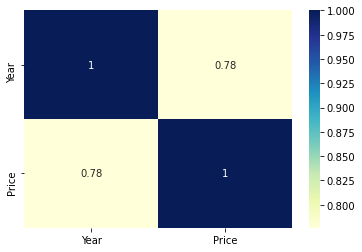

In [7]:
sns.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu')
plt.show()

In [8]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [9]:
x = data.drop(['Price'], axis = 1) ## independent i.e target variable i.e Year
y = data['Price']## dependent variable

In [10]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [11]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

## Splitting the data into train and test data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [15]:
x_train

,Year
66,2017
90,2017
62,2017
22,2015
85,2015
...,...
106,2015
14,2017
92,2017
51,2018


In [16]:
y_train

66     525000
90     520000
62     540000
22     434999
85     320000
        ...  
106    300000
14     475000
92     520000
51     550000
102    350000
Name: Price, Length: 89, dtype: int64

## Using Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

## Train the model

lin_regressor = LinearRegression() ## creating instance of LinearRegression
model = lin_regressor.fit(x_train,y_train)

### Evaluate model performance

In [18]:
predictions = model.predict(x_test)

In [26]:
from sklearn.metrics import mean_squared_error,r2_score
linear_mse = mean_squared_error(y_test, predictions)
linear_r2 = r2_score(y_test,predictions)
print('Mean Squared Error = ', linear_mse)
print('R Squared Value = ', linear_r2)

Mean Squared Error =  4326906256.829671
R Squared Value =  0.36759313425902185


## Using Lasso Regression

In [20]:
from sklearn.linear_model import Lasso

## Train the model

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.1)

### Evaluate model performance

In [22]:
lasso_pred = lasso_model.predict(x_test)

In [23]:
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

In [25]:
print("\nLasso Regression:")
print("MSE:", lasso_mse)
print("R-squared:", lasso_r2)


Lasso Regression:
MSE: 4326901608.19506
R-squared: 0.36759381368868127


## Predict the price for 2022 model

In [32]:
if linear_r2 > lasso_r2:
    chosen_model = linear_model
else:
    chosen_model = lasso_model

In [33]:
year_2022 = [[2022]]
predicted_price = chosen_model.predict(year_2022)
print("Predicted price for a 2022 model:", predicted_price)
print('The chosen Model : ', chosen_model)

Predicted price for a 2022 model: [743601.39177768]
The chosen Model :  Lasso(alpha=0.1)
